In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [19]:
benin = pd.read_csv("../data/benin_clean.csv")
sierra = pd.read_csv("../data/sierra_leone_clean.csv")
togo = pd.read_csv("../data/togo_clean.csv")


In [20]:
benin['Country'] = 'Benin'
sierra['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'


In [21]:
combined = pd.concat([benin, sierra, togo], ignore_index=True)


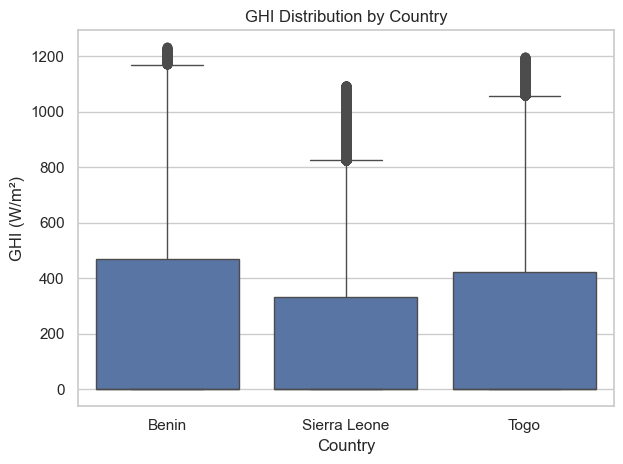

In [22]:
sns.boxplot(data=combined, x="Country", y="GHI")
plt.title("GHI Distribution by Country")
plt.xlabel("Country")
plt.ylabel("GHI (W/m²)")
plt.tight_layout()


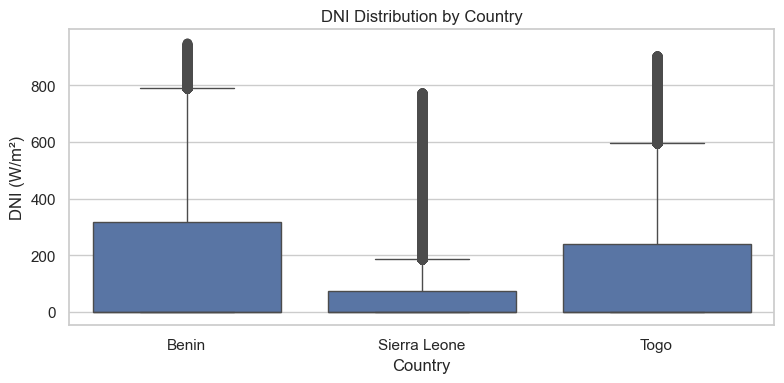

In [23]:
# DNI Distribution by Country
plt.figure(figsize=(8, 4))
sns.boxplot(data=combined, x="Country", y="DNI")
plt.title("DNI Distribution by Country")
plt.xlabel("Country")
plt.ylabel("DNI (W/m²)")
plt.tight_layout()


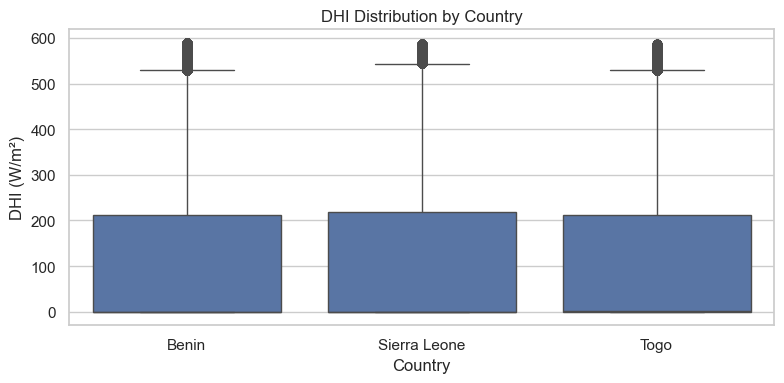

In [24]:
# DHI Distribution by Country
plt.figure(figsize=(8, 4))
sns.boxplot(data=combined, x="Country", y="DHI")
plt.title("DHI Distribution by Country")
plt.xlabel("Country")
plt.ylabel("DHI (W/m²)")
plt.tight_layout()


In [25]:
summary = combined.groupby("Country")[["GHI", "DNI", "DHI"]].agg(["mean", "median"])
summary


GHI                DNI                DHI       
                    mean median        mean median        mean median
Country                                                              
Benin         237.484571    0.6  167.144091    0.0  113.166760    0.4
Sierra Leone  187.214752    0.0  104.210233    0.0  110.503601    0.0
Togo          225.028731    0.5  147.968936    0.0  112.777219    1.5

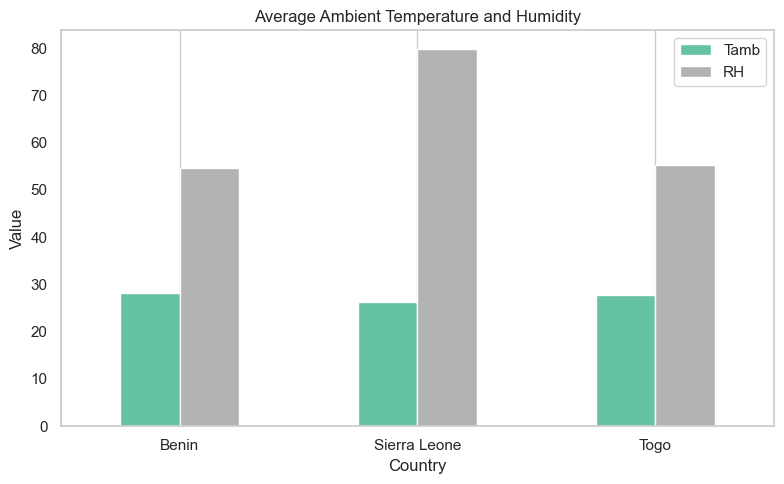

In [27]:
weather_means = combined.groupby("Country")[["Tamb", "RH"]].mean().reset_index()

weather_means.plot(kind='bar', x='Country', figsize=(8, 5), colormap="Set2")
plt.title("Average Ambient Temperature and Humidity")
plt.ylabel("Value")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


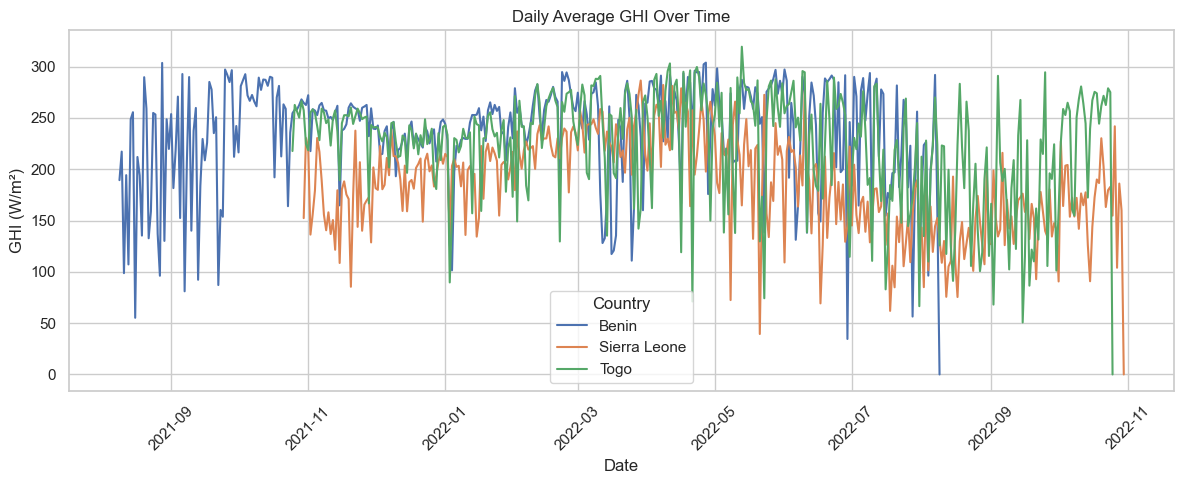

In [26]:
# Prepare daily average
combined["Date"] = pd.to_datetime(combined["Timestamp"]).dt.date
daily = combined.groupby(["Country", "Date"])[["GHI"]].mean().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(data=daily, x="Date", y="GHI", hue="Country")
plt.title("Daily Average GHI Over Time")
plt.xlabel("Date")
plt.ylabel("GHI (W/m²)")
plt.xticks(rotation=45)
plt.tight_layout()


## Cross-Country Comparison — Key Insights

1. **GHI**  
   - Benin and Togo have higher median GHI (~270 W/m²) than Sierra Leone (~200 W/m²).  
   - Togo shows more extreme high-end outliers, suggesting occasional very clear-sky conditions.

2. **DNI & DHI**  
   - Sierra Leone exhibits the lowest median DNI and DHI, indicating more diffuse/cloudy conditions.  
   - Benin has the highest median DNI, making it potentially more suitable for concentrating solar technologies.

3. **Seasonal Patterns**  
   - Daily GHI trends show similar seasonality across all countries, with peaks in the dry season (Dec–Apr) and dips in the wet season (May–Oct).  
   - Togo’s peaks are slightly higher than Benin’s, but both follow the same seasonal cycle.

4. **Recommendation**  
   - **Best Overall:** Benin and Togo for high sunlight availability.  
   - **Most Consistent:** Sierra Leone shows less variability but also lower solar potential.  
   - For solar farm investments, prioritize Benin for balance of high median GHI and moderate variability.  
